In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [65]:
df=pd.read_csv('homicide_by_countries.csv')
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [66]:
df.shape

(195, 6)

In [67]:
df.isnull().sum()
df.dropna(subset=['Subregion'], inplace= True)

In [68]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [69]:
my_list=['Rate','Count','Year',]
for i in my_list:
    print(i)
    df[i]=df[i].astype('int')

Rate
Count
Year


In [70]:
df['Region'].replace('Americas', 'N/S America', inplace=True)
df

C:\Users\Srignanaguru\AppData\Local\Temp\ipykernel_2740\3152650206.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [71]:
df1=df.sort_values('Count', ascending=False).reset_index(drop=True)
df1.head()

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,N/S America,South America,22,47722,2020
1,Nigeria,Africa,Western Africa,22,44200,2019
2,India,Asia,Southern Asia,3,40651,2020
3,Mexico,N/S America,Central America,28,36579,2020
4,United States,N/S America,Northern America,6,21570,2020


In [72]:
df1=df1[['Location','Count']].sort_values(by='Count', ascending=False).head(5)
df1['Perc']=(df1['Count']*100/df1['Count'].sum()).round(2)
df1

,Location,Count,Perc
0,Brazil,47722,25.02
1,Nigeria,44200,23.18
2,India,40651,21.31
3,Mexico,36579,19.18
4,United States,21570,11.31


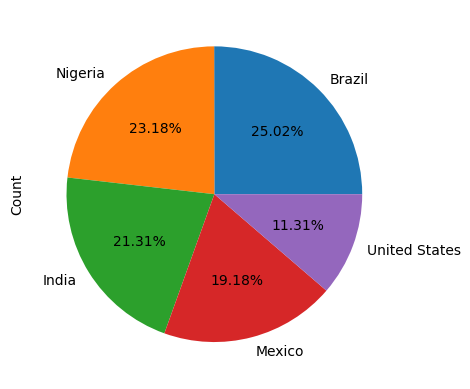

In [73]:
df1.plot(x='Location',y='Count', kind='pie', labels=df1.Location, autopct='%1.2f%%')
plt.legend().set_visible(False)

In [74]:
df2=df.groupby('Region')['Count'].sum().sort_values(ascending=False)
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int64

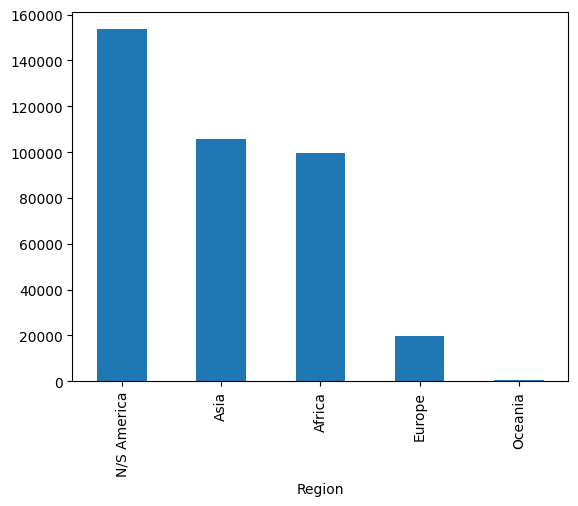

In [75]:
df2.plot(kind='bar')
plt.show()

In [76]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending=False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

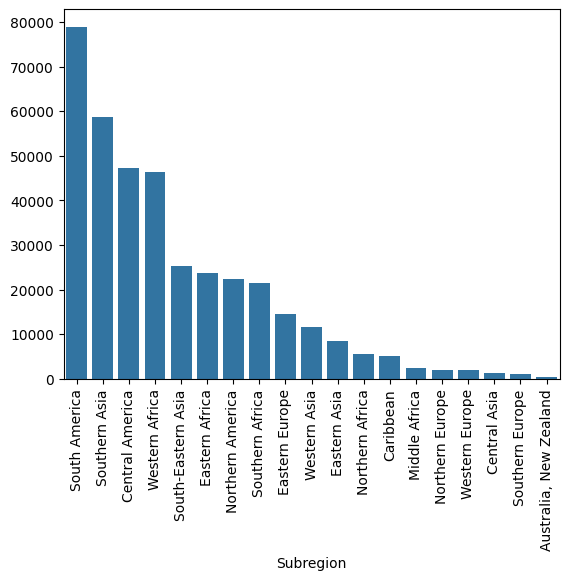

In [77]:
sns.barplot(x=df3.index, y=df3.values)
plt.xticks(rotation='vertical')
xlabel=None

In [78]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2011     5
2013     5
2014     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [79]:
df[df['Region'].isin(['Asia','Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [80]:
df4=df[(df['Region']=='Asia')| (df['Region']=='Europe')]

In [81]:
df4=df4[df4['Year']>2016][['Region','Year','Count']]

In [82]:
df4=df4.groupby(['Region','Year']).sum(['Count'])
df4

Count
Region Year       
Asia   2017   1787
       2018  16923
       2019   6458
       2020  53516
       2021  15299
Europe 2017   3670
       2018    883
       2019    249
       2020  15066

In [83]:
df_unstacked = df4.unstack(level=0)
df_unstacked

Count         
Region     Asia   Europe
Year                    
2017     1787.0   3670.0
2018    16923.0    883.0
2019     6458.0    249.0
2020    53516.0  15066.0
2021    15299.0      NaN

In [84]:
df_unstacked.index=df_unstacked.index.astype(int).astype(str)

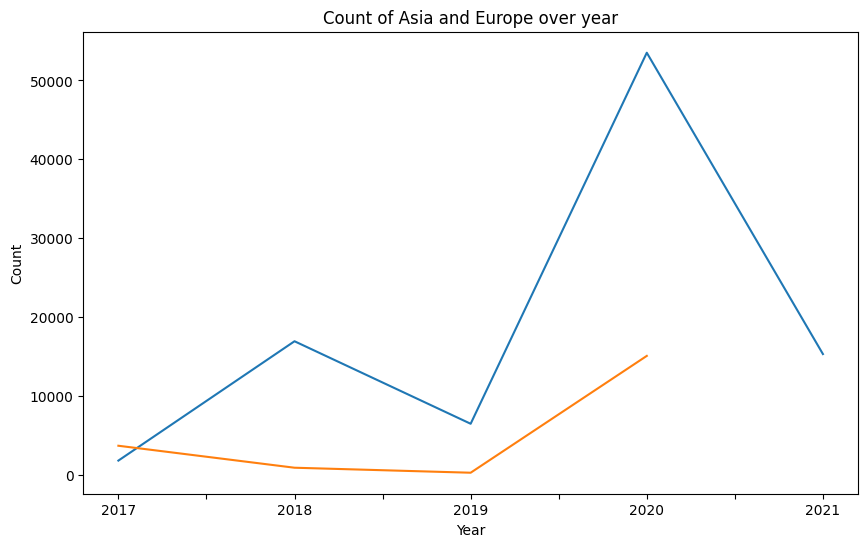

In [85]:
df_unstacked.plot(kind='line', figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Asia and Europe over year')
plt.legend().set_visible(False)

In [86]:
df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending=False)
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int64

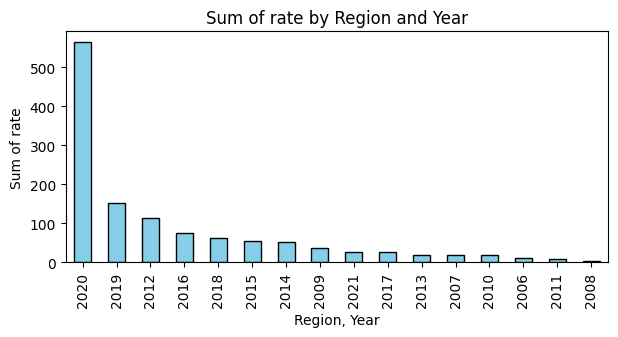

In [87]:
df5.plot(kind='bar', figsize=(7,3), color='skyblue', edgecolor='black')
plt.xlabel('Region, Year')
plt.ylabel('Sum of rate')
plt.title('Sum of rate by Region and Year')
plt.legend().set_visible(False)

In [88]:
df6=df[['Region','Year','Count']]
df6=df6.groupby(['Year','Region']).sum().sort_values(by='Year', ascending=False).head(40)
df6

Count
Year Region             
2021 Asia          15299
2020 Oceania         221
     N/S America  134784
     Asia          53516
     Africa        28460
     Europe        15066
2019 Europe          249
     Asia           6458
     Africa        44210
     N/S America    4276
     Oceania         126
2018 Asia          16923
     Europe          883
     N/S America   13793
2017 Asia           1787
     Africa         1467
     Europe         3670
2016 N/S America     608
     Asia            627
     Europe            0
     Africa         4987
2015 Asia            241
     Africa         2206
     Europe            0
2014 Asia           3029
     N/S America      13
2013 Asia           5782
2012 Africa        15264
     Asia             61
     N/S America      53
2011 Africa          855
     Asia           1626
     Europe            0
2010 Africa          303
     Europe            1
2009 Africa           27
     N/S America      42
2008 Africa         1702
2007 N/S America      26
2006 N/S America       2

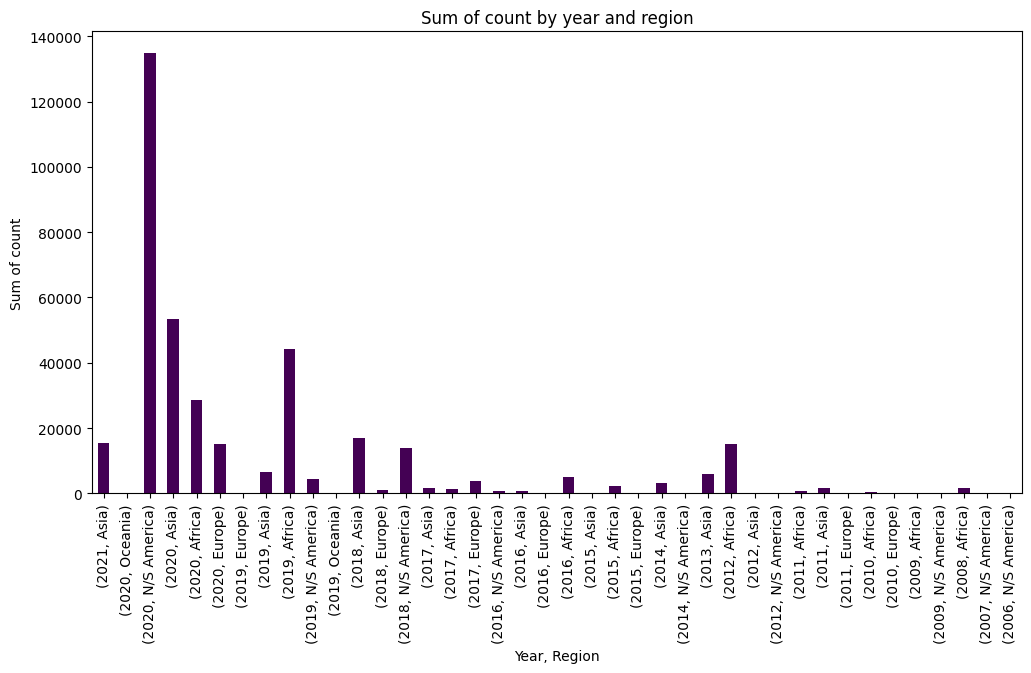

In [89]:
df6.plot(kind='bar', figsize=(12,6), colormap='viridis')
plt.xlabel('Year, Region')
plt.ylabel('Sum of count')
plt.title('Sum of count by year and region')
plt.legend().set_visible(False)

In [90]:
df7 = df.groupby('Subregion')['Count'].mean().sort_values(ascending=False)
df7

Subregion
Southern Asia             6514.555556
South America             6067.076923
Central America           5921.375000
Northern America          4463.400000
Southern Africa           4295.800000
Western Africa            4210.727273
South-Eastern Asia        2531.400000
Eastern Africa            1577.933333
Eastern Europe            1460.400000
Eastern Asia              1223.285714
Northern Africa           1107.600000
Middle Africa              619.250000
Western Asia               581.900000
Central Asia               281.200000
Western Europe             230.555556
Caribbean                  201.480000
Australia, New Zealand     173.500000
Northern Europe            139.800000
Southern Europe             64.294118
Name: Count, dtype: float64

In [91]:
df7.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [92]:
df7.values

array([6514.55555556, 6067.07692308, 5921.375     , 4463.4       ,
       4295.8       , 4210.72727273, 2531.4       , 1577.93333333,
       1460.4       , 1223.28571429, 1107.6       ,  619.25      ,
        581.9       ,  281.2       ,  230.55555556,  201.48      ,
        173.5       ,  139.8       ,   64.29411765])

In [93]:
data={
    'Category':df7.index,
    'Values':df7.values,
    'Info':df7.values
}
df=pd.DataFrame(data)
df


,Category,Values,Info
0,Southern Asia,6514.555556,6514.555556
1,South America,6067.076923,6067.076923
2,Central America,5921.375000,5921.375000
3,Northern America,4463.400000,4463.400000
4,Southern Africa,4295.800000,4295.800000
5,Western Africa,4210.727273,4210.727273
6,South-Eastern Asia,2531.400000,2531.400000
7,Eastern Africa,1577.933333,1577.933333
8,Eastern Europe,1460.400000,1460.400000
9,Eastern Asia,1223.285714,1223.285714
